# Student Math Performance Analysis


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv("Maths.csv")

In [23]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [25]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [26]:
df1=df.duplicated()
df1

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391    False
392    False
393    False
394    False
Length: 395, dtype: bool

In [27]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>],
       [<AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'Dalc'}>,
        <AxesSubplot:title={'center':'Walc'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>,
        <AxesSubplot:title={'center':'G3'}>]], dtype=object)

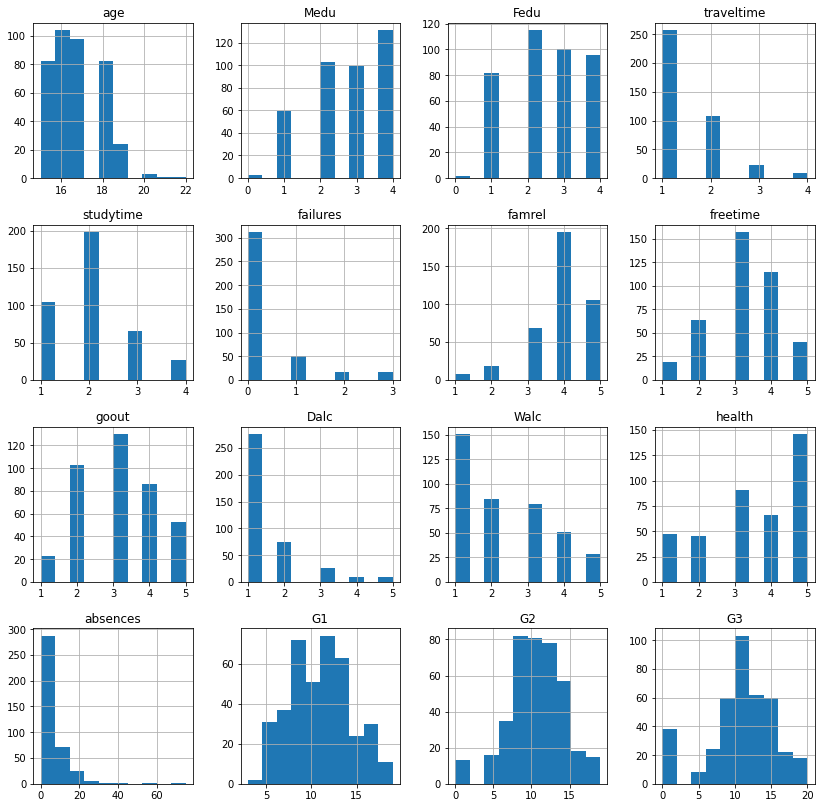

In [28]:
#plot histogram on numerial data

df.hist(figsize = [14,14])

In [29]:
#categorical data summary
df.describe(include = 'object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


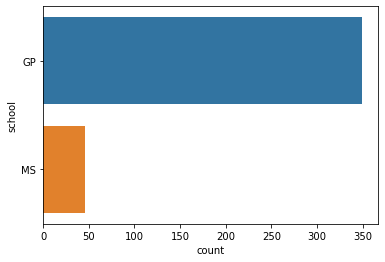

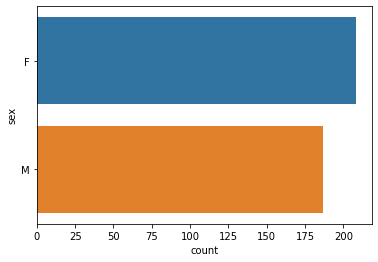

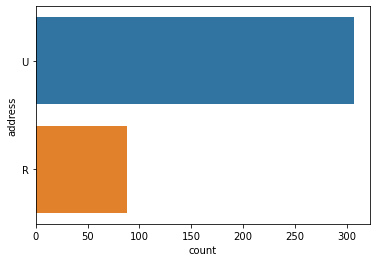

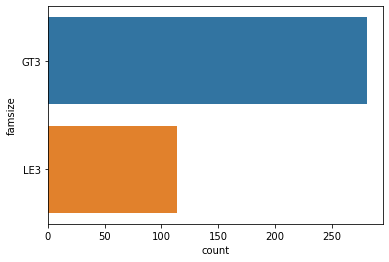

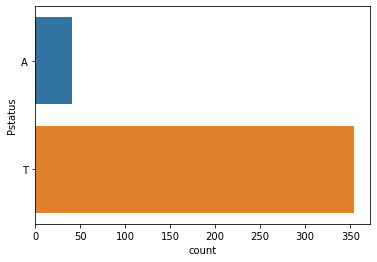

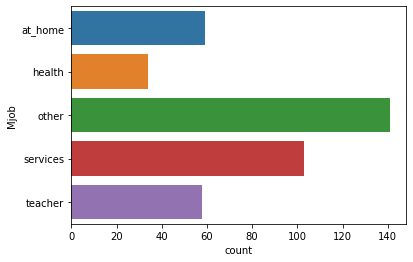

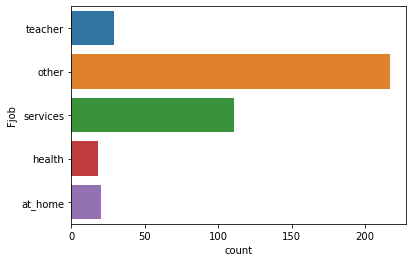

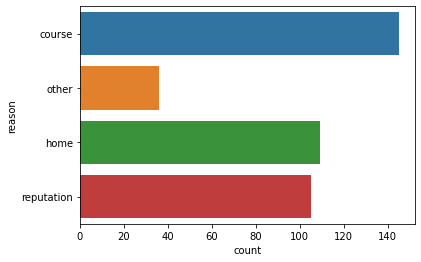

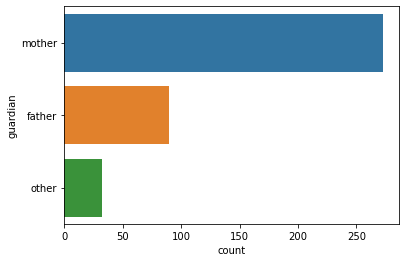

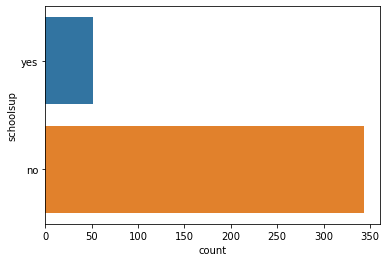

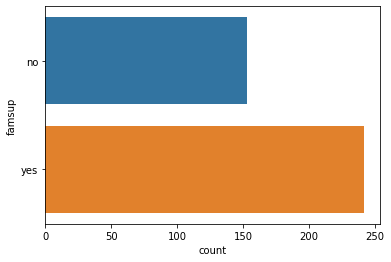

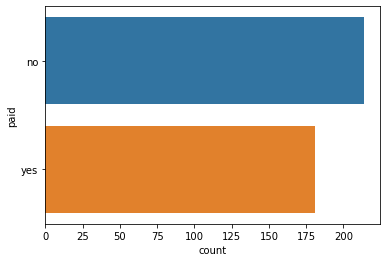

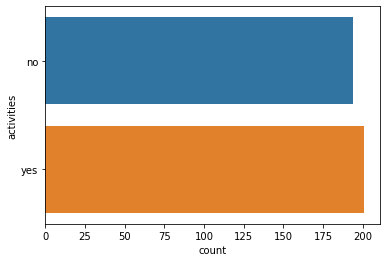

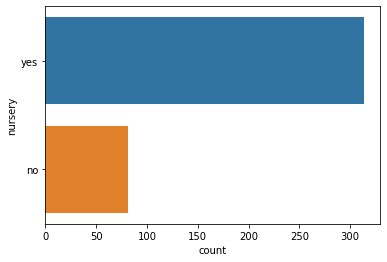

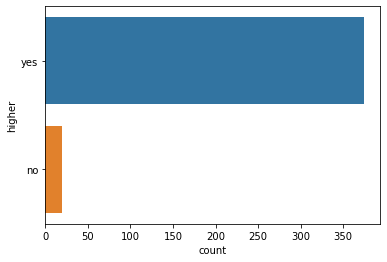

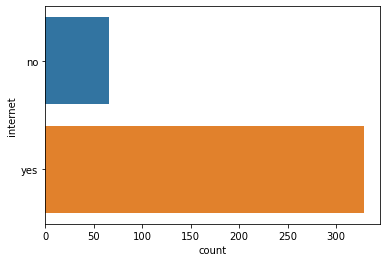

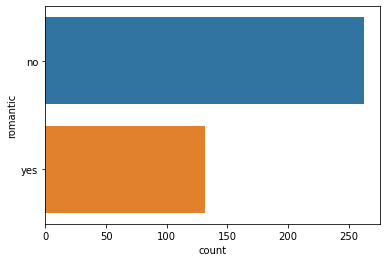

In [30]:
# visualise categorical data using bar plot
for feature in df.dtypes[df.dtypes =='object'].index:
    sns.countplot(y = feature, data = df)
    plt.show()

In [31]:
#correlations between numerical features
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


<AxesSubplot:>

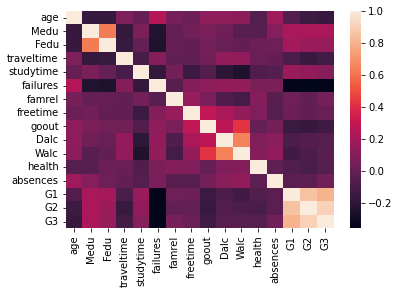

In [32]:
sns.heatmap(df.corr())

From the heatmap, we can see there were NO strong correlations among the numerical features, except the results G1, G2 and G3.

In [33]:
#data in ordinal form, replace GT3 with 1 and LE3 with 0
df.famsize.replace(['GT3','LE3'],[1,0], inplace = True)

In [34]:
#create dummy variables for categorical features to allow us run ML algorithm on our dataset
df = pd.get_dummies(df)

In [35]:
df.shape

(395, 58)

In [36]:
df.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,1,4,4,2,2,0,4,3,4,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,1,2,0,5,3,3,...,1,0,1,0,0,1,0,1,1,0
2,15,0,1,1,1,2,3,4,3,2,...,1,0,0,1,0,1,0,1,1,0
3,15,1,4,2,1,3,0,3,2,2,...,0,1,0,1,0,1,0,1,0,1
4,16,1,3,3,1,2,0,4,3,2,...,1,0,0,1,0,1,1,0,1,0


# Model Training

In [37]:
df_copy=df.copy()

In [38]:
X = df_copy.drop(["G3"],axis=1)
y = df_copy["G3"]

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1234)

In [40]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((316, 57), (79, 57), (316,), (79,))

we have 316 training dataset,79 testing dataset

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [42]:
y_predicted=lm.predict(X_train)
y_predicted_train=y_predicted

In [43]:
y_predicted=lm.predict(X_test)
y_predicted_test=y_predicted

In [44]:
lm.score(X_train,y_train)

0.8457128351454543

In [45]:
lm.score(X_test,y_test)

0.8196424779237076

In [46]:
from sklearn.metrics import mean_squared_error as mse
R2_train = round(lm.score(X_train,y_train),3)
print("The R2 value of the Training Set is : {}".format(R2_train))

The R2 value of the Training Set is : 0.846


In [47]:
y_predicted=lm.predict(X_test)
R2_test= round(lm.score(X_test,y_test),3)
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 0.82


In [48]:
from sklearn.linear_model import Lasso

In [49]:
lasso_reg = Lasso(normalize=True)
lasso_reg.fit(X_train,y_train)

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(normalize=True)

In [50]:
y_predicted=lasso_reg.predict(X_train)
y_predicted_train=y_predicted

In [51]:
y_predicted=lasso_reg.predict(X_test)
y_predicted_test=y_predicted

In [52]:
lasso_reg.score(X_train,y_train)

0.0

In [53]:
lasso_reg.score(X_test,y_test)

-0.0019375364492215663

In [54]:
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier()
Rmodel.fit(X_train,y_train)
y_predict = Rmodel.predict(X_test)
y_predict

array([ 0,  9, 12, 15, 15, 10,  8, 10,  6,  0, 15, 10, 15,  8, 11, 15, 19,
       10,  0, 11,  6, 10,  9, 16,  0, 16, 13, 11, 11, 10, 10, 14, 15, 15,
        9, 10,  9, 10, 12, 10, 15, 13,  8, 10,  9,  8,  0,  0, 11,  9, 11,
       14, 10,  9, 15, 11, 13,  8,  0, 16,  9,  0,  0,  8, 12,  9, 11, 10,
       15, 13,  9, 12,  8, 13, 10, 13,  0,  0, 14], dtype=int64)

In [55]:

accuracy_score(y_test,y_predict)*100

26.582278481012654

In [56]:
import pickle
pickle.dump(lm, open('Studentperformace_prediction.pkl', 'wb'))

In [57]:
import pickle

def Student_prediction(features):
    
    pickled_model = pickle.load(open('Studentperformace_prediction.pkl', 'rb'))
    student_grade = str(round(list(pickled_model.predict([features]))[0]))
    
    return str("grade may be "  + student_grade)

In [58]:
import random
test_features  = list(X_test.iloc[random.randint(0,80),:])

In [59]:
Student_prediction(test_features)

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'grade may be 5'